## Final Project: Word Embedding

DIS SU22 Artficial Neural Network and Deep Learning
Daniel Florness, Heesang Han, Ed Keating
1 July 2022

In [4]:
%matplotlib inline

import numpy as np

from nltk.corpus import wordnet

import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = nltk.corpus.stopwords.words('english')

import keras
import re
import math

import tensorflow.keras

import matplotlib.pyplot as plt


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hs1sc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hs1sc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hs1sc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hs1sc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
lyrics_file = open('beatles.txt', 'r')
text = lyrics_file.read()
lyrics_file.close()

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

def preprocess(tokens):
    tokens_processed = []
    for words in tokens:
        if words in stop_words:
            continue
        if len(words) <= 2:
            continue

        tokens_processed.append(words)

    print(str(len(tokens_processed)) + ' tokens generated')
    return tokens_processed

def mapping(tokens):
    word_to_id = {}
    id_to_word = {}

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    print('Token Mapping Complete')

    return word_to_id, id_to_word


def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)

    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i),
            range(i, min(n_tokens, i + window + 1))
        )
        i_id = word_to_id[tokens[i]]
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(i_id, len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))

        if i%1000 == 0:
            print('Training Data Generated for ' + str(i) + ' Tokens')

    print('Training Data Generated')
    return np.array(X), np.array(y)



def concat(*iterables):
    for iterable in iterables:
        yield from iterable


def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

tokens = preprocess(tokenize(text))


word_to_id, id_to_word = mapping(tokens)
print(word_to_id)


X, y = generate_training_data(tokens, word_to_id, 3)

print(X.shape)

7260 tokens generated
Token Mapping Complete
{'together': 0, 'rob': 1, 'heba': 2, 'sound': 3, 'nine': 4, 'seconds': 5, 'book': 6, 'wear': 7, 'saw': 8, 'road': 9, 'pornographic': 10, 'swim': 11, 'hurting': 12, 'shadow': 13, 'closer': 14, 'making': 15, 'sweater': 16, 'vain': 17, 'puts': 18, 'day': 19, 'took': 20, 'drive': 21, 'cos': 22, 'grow': 23, 'crossed': 24, 'sgt': 25, 'noticed': 26, 'bus': 27, 'raleigh': 28, 'undying': 29, 'returning': 30, 'slither': 31, 'lead': 32, 'high': 33, 'vont': 34, 'self': 35, 'morning': 36, 'lets': 37, 'brother': 38, 'molly': 39, 'keep': 40, 'pride': 41, 'lil': 42, 'woke': 43, 'lit': 44, 'made': 45, 'thinking': 46, 'solitude': 47, 'gallery': 48, 'wings': 49, 'birthday': 50, 'newspaper': 51, 'open': 52, 'blew': 53, 'wave': 54, 'magill': 55, 'shore': 56, 'neighborhood': 57, 'forget': 58, 'garden': 59, 'job': 60, 'carousel': 61, 'tonight': 62, "tuesday's": 63, 'sincerely': 64, 'greetings': 65, 'possessions': 66, 'raincoats': 67, 'finger': 68, 'boys': 69, 'flo

In [6]:
num_neurons = X.shape[1]
model = keras.Sequential()
model.add(keras.layers.Dense(100, input_dim=num_neurons, activation='relu'))
model.add(keras.layers.Dense(num_neurons, activation='softmax'))

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(X, y, epochs=100, batch_size=128)
model.summary()


Epoch 1/100
341/341 [==============================] - 2s 5ms/step - loss: 6.4330 - accuracy: 0.0495
Epoch 2/100
341/341 [==============================] - 2s 6ms/step - loss: 5.9213 - accuracy: 0.0821
Epoch 3/100
341/341 [==============================] - 2s 6ms/step - loss: 5.6071 - accuracy: 0.1144
Epoch 4/100
341/341 [==============================] - 2s 6ms/step - loss: 5.3302 - accuracy: 0.1315
Epoch 5/100
341/341 [==============================] - 2s 6ms/step - loss: 5.0865 - accuracy: 0.1451
Epoch 6/100
341/341 [==============================] - 2s 6ms/step - loss: 4.8672 - accuracy: 0.1542
Epoch 7/100
341/341 [==============================] - 2s 6ms/step - loss: 4.6653 - accuracy: 0.1602
Epoch 8/100
341/341 [==============================] - 2s 5ms/step - loss: 4.4810 - accuracy: 0.1646
Epoch 9/100
341/341 [==============================] - 2s 6ms/step - loss: 4.3149 - accuracy: 0.1659
Epoch 10/100
341/341 [==============================] - 2s 6ms/step - loss: 4.1681 - accura

Text(0.5, 1.0, 'Model Training Performance')

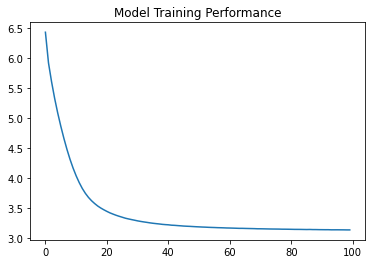

In [7]:
plt.plot(history.history['loss'])
plt.title('Model Training Performance')

In [8]:
model2 = keras.Model(inputs=model.inputs, outputs=model.layers[0].output)
model2.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 1467)]            0         
                                                                 
 dense (Dense)               (None, 100)               146800    
                                                                 
Total params: 146,800
Trainable params: 146,800
Non-trainable params: 0
_________________________________________________________________


In [9]:
word_vectors = []

for i in range(num_neurons):
    word_vectors.append(one_hot_encode(i, num_neurons))

word_vectors = np.array(word_vectors)

enc = model2.predict(word_vectors)

46/46 [==============================] - 0s 995us/step


In [10]:
lyrics_file = open('johnny-cash.txt', 'r')
text2 = lyrics_file.read()
lyrics_file.close()

tokens2 = preprocess(tokenize(text2))

word_to_id2, id_to_word2 = mapping(tokens2)
print(word_to_id2)


X2, y2 = generate_training_data(tokens2, word_to_id2, 3)

X2.shape


9008 tokens generated
Token Mapping Complete
{'falls': 0, 'together': 1, 'sound': 2, 'nine': 3, 'arms': 4, 'breakfast': 5, 'seconds': 6, 'realize': 7, 'cries': 8, 'wear': 9, 'tocapillo': 10, 'thief': 11, 'beauregard': 12, 'drove': 13, 'familiar': 14, 'saw': 15, 'road': 16, 'echoed': 17, 'panama': 18, 'pray': 19, 'shook': 20, 'livestock': 21, 'quickly': 22, 'smiled': 23, 'gotta': 24, 'toll': 25, 'shadow': 26, 'celestial': 27, "pumpin'": 28, 'crown': 29, 'making': 30, 'baton': 31, 'day': 32, 'took': 33, 'hours': 34, 'bread': 35, 'large': 36, 'fellas': 37, 'blame': 38, 'drive': 39, 'considered': 40, 'muscles': 41, 'crossed': 42, 'songs': 43, 'noticed': 44, 'kingdom': 45, 'bus': 46, 'prepare': 47, 'fin': 48, 'sets': 49, 'strong': 50, 'skinful': 51, 'lead': 52, 'high': 53, 'morning': 54, 'emerald': 55, 'canyons': 56, 'borderline': 57, 'brother': 58, 'keep': 59, 'pride': 60, 'woke': 61, 'wheels': 62, 'lit': 63, 'cents': 64, 'melodious': 65, 'hats': 66, 'made': 67, 'album': 68, 'wined': 69, '

(54036, 2281)

In [11]:
num_neurons2 = X2.shape[1]
print(num_neurons2)
model3 = keras.Sequential()
model3.add(keras.layers.Dense(100, input_dim=num_neurons2, activation='relu'))
model3.add(keras.layers.Dense(num_neurons2, activation='softmax'))

model3.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history2 = model3.fit(X2, y2, epochs=100, batch_size=128)
model3.summary()

2281
Epoch 1/100
423/423 [==============================] - 5s 10ms/step - loss: 7.1220 - accuracy: 0.0098
Epoch 2/100
423/423 [==============================] - 4s 9ms/step - loss: 6.8678 - accuracy: 0.0163
Epoch 3/100
423/423 [==============================] - 3s 8ms/step - loss: 6.6953 - accuracy: 0.0356
Epoch 4/100
423/423 [==============================] - 3s 8ms/step - loss: 6.4179 - accuracy: 0.0538
Epoch 5/100
423/423 [==============================] - 4s 8ms/step - loss: 6.1202 - accuracy: 0.0654
Epoch 6/100
423/423 [==============================] - 4s 8ms/step - loss: 5.8303 - accuracy: 0.0742
Epoch 7/100
423/423 [==============================] - 4s 9ms/step - loss: 5.5545 - accuracy: 0.0796
Epoch 8/100
423/423 [==============================] - 4s 9ms/step - loss: 5.3012 - accuracy: 0.0845
Epoch 9/100
423/423 [==============================] - 4s 8ms/step - loss: 5.0736 - accuracy: 0.0859
Epoch 10/100
423/423 [==============================] - 4s 9ms/step - loss: 4.8728 - 

Text(0.5, 1.0, 'Model Training Performance')

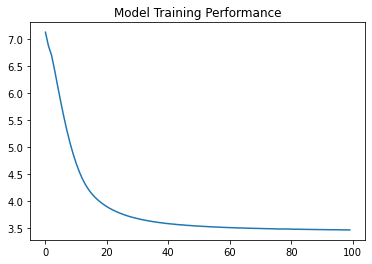

In [12]:
plt.plot(history2.history['loss'])
plt.title('Model Training Performance')

In [13]:
model4 = keras.Model(inputs=model3.inputs, outputs=model3.layers[0].output)
model4.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2_input (InputLayer)  [(None, 2281)]            0         
                                                                 
 dense_2 (Dense)             (None, 100)               228200    
                                                                 
Total params: 228,200
Trainable params: 228,200
Non-trainable params: 0
_________________________________________________________________


In [14]:
word_vectors2 = []

for i in range(num_neurons2):
    word_vectors2.append(one_hot_encode(i, num_neurons2))

word_vectors2 = np.array(word_vectors2)

enc2 = model4.predict(word_vectors2)
print(enc2.shape)

72/72 [==============================] - 0s 2ms/step
(2281, 100)


{'everybody': 4.5287485, 'tres': 4.7891493, 'learns': 4.7904983, 'enough': 4.852195, 'believing': 4.9244704, 'bring': 4.95257, 'bom': 4.9619966, 'max': 5.0069423, 'know': 5.0149508, 'equal': 5.0168915}


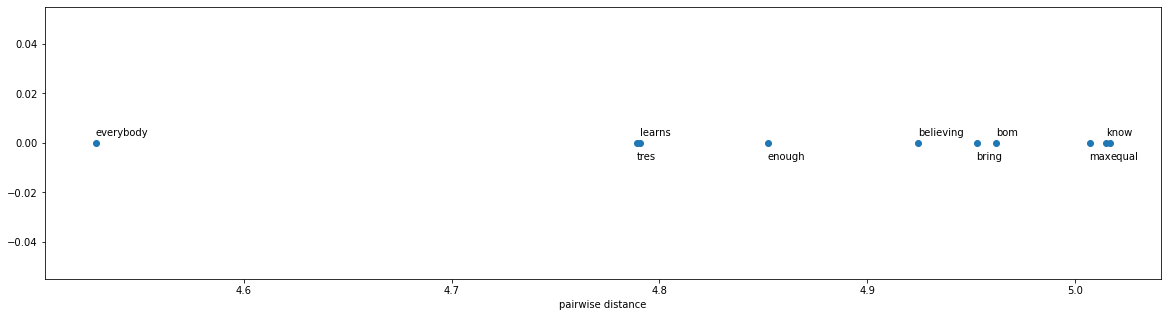

In [15]:
p = list()
target = np.array(enc[word_to_id.get('love')])

for i in range(num_neurons):
    p.append(np.linalg.norm(target - np.array(enc[i])))

p = np.array(p)
a = list(np.argsort(p))

lab = list()
pp = list()

dic = {}

fig, ax = plt.subplots()
fig.set_size_inches(20,5)

for k in range(1,11):
    lab.append(id_to_word.get(a[k]))
    pp.append([p[a[k]]])
    dic[id_to_word.get(a[k])] = p[a[k]]

plt.scatter(pp, np.zeros((10)))
plt.xlabel('pairwise distance')

print(dic)


pp = np.array(pp)

for k in range(10):
    plt.annotate(lab[k], (pp[k], 0.005*math.pow(-1, k) - 0.002))


{'hallow': 5.1552143, 'howlered': 5.214243, 'panicked': 5.2670016, 'shattered': 5.2895746, 'anyway': 5.3285956, 'shocked': 5.39241, 'babydoll': 5.414915, 'blessings': 5.418156, 'saviour': 5.438018, "burnin'": 5.5280056}


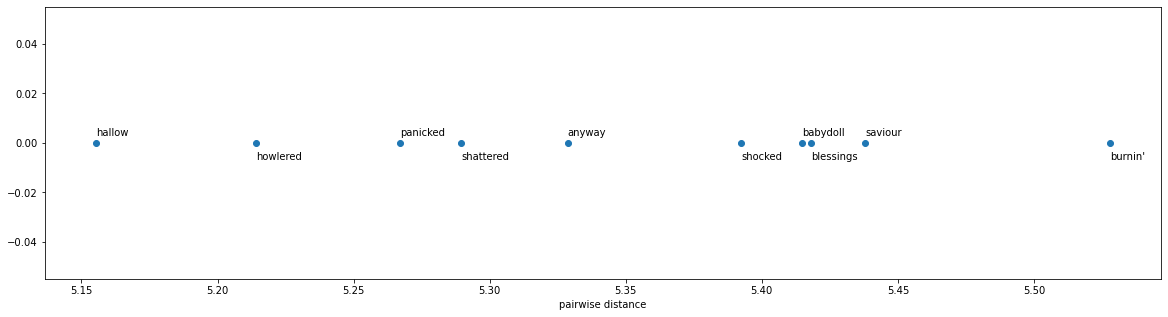

In [16]:
p2 = list()
target2 = np.array(enc2[word_to_id2.get('love')])

for i in range(num_neurons2):
    p2.append(np.linalg.norm(target2 - np.array(enc2[i])))

p2 = np.array(p2)
a2 = list(np.argsort(p2))

lab2 = list()
pp2 = list()

dic2 = {}

fig2, ax2 = plt.subplots()
fig2.set_size_inches(20,5)
for k in range(1,11):
    lab2.append(id_to_word2.get(a2[k]))
    pp2.append([p2[a2[k]]])
    dic2[id_to_word2.get(a2[k])] = p2[a2[k]]

plt.scatter(pp2, np.zeros((10)))
plt.xlabel('pairwise distance')

print(dic2)


pp2 = np.array(pp2)

for k in range(10):
    plt.annotate(lab2[k], (pp2[k], 0.005*math.pow(-1, k) - 0.002))